# Ultimate Challenge

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [89]:
df = pd.read_json('logins.json')

In [90]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [92]:
df.describe

<bound method NDFrame.describe of                login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]>

In [93]:
#reorder logins and reindex
df.sort_values('login_time')
df.reset_index(drop=True)



,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [94]:
df['month']= df.login_time.dt.month_name()
df['month_num']= df.login_time.dt.month
df['week_num']= df.login_time.dt.week
df['day_num']= df.login_time.dt.day
df['weekday']= df.login_time.dt.day_name()
df.set_index(['login_time'], inplace = True)

In [95]:
df1 = df.drop(['month', 'month_num', 'day_num', 'weekday'], axis=1).copy()
df1['count'] = 1

df1 = df1.resample('15T', label='right', closed='right').sum()

In [96]:
df1.head()

,week_num,count
login_time,,
1970-01-01 20:15:00,2,2
1970-01-01 20:30:00,6,6
1970-01-01 20:45:00,9,9
1970-01-01 21:00:00,7,7
1970-01-01 21:15:00,1,1


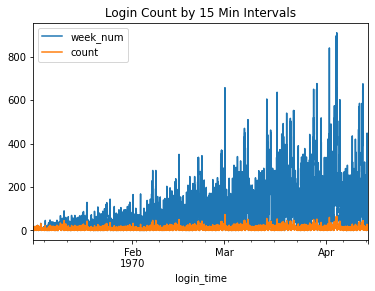

In [97]:
df1.plot(title="Login Count by 15 Min Intervals")

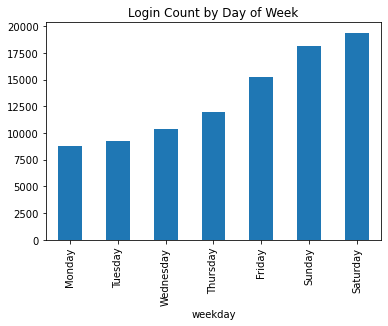

In [98]:
df.groupby(['weekday'])['weekday'].count().sort_values().plot(kind='bar', title="Login Count by Day of Week")

In [99]:
df['hour']= df.index.map(lambda x: x.hour)
df.head()

,month,month_num,week_num,day_num,weekday,hour
login_time,,,,,,
1970-01-01 20:13:18,January,1,1,1,Thursday,20
1970-01-01 20:16:10,January,1,1,1,Thursday,20
1970-01-01 20:16:37,January,1,1,1,Thursday,20
1970-01-01 20:16:36,January,1,1,1,Thursday,20
1970-01-01 20:26:21,January,1,1,1,Thursday,20



part 2



1.) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Since we dont have much more information we should monitor the stops at each driving partner makes during their shift. It would be an easy item to measure since stops should already be recorded for billing purposes. If drivers pass a certain threshold of stop made in both cities, I would consider it a success.



2.) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:


a. how you will implement the experiment


b. what statistical test(s) you will conduct to verify the significance of the observation


c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.



a) The experiment would be something that would already be trackable now. All we need is the records from the billing department. Once a baseline is found using past results, we can watch to see how the new policy effects where drivers will stop.


b) T-test will be used to see if the results from the new data were a significant deviation from the past results.


c) Depending on the results of the T-test, itcan be prefered either to recommend for the program to continue or to tell them that the policy is not working and to find another way.


# Part--3

In [106]:
import json
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)
ultimate = pd.DataFrame(data)



In [107]:
ultimate.info

<bound method DataFrame.info of                  city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2   

In [108]:
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [109]:
#drop all rows with null values.
ultimate = ultimate.dropna()
ultimate.info()
ultimate.reset_index(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [110]:
#convert to datetime objs
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'])
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'])
ultimate['retention'] = ''

#measure retention in days
def day_counter(num):
    y = ultimate['last_trip_date'][num]-ultimate['signup_date'][num]
    return y
ultimate['retention'] = ultimate.index.map(lambda x: day_counter(x))

#develop target variable
ultimate['target'] = ultimate['retention'] >= datetime.timedelta(days=180)

<ipython-input-110-f6a37d7ccc08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'])
<ipython-input-110-f6a37d7ccc08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'])
<ipython-input-110-f6a37d7ccc08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [111]:
#find unique values of phone and city
ultimate.phone.unique()
ultimate.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [112]:
#add dummy variables
city = pd.get_dummies(ultimate.city)
ultimate = ultimate.join(city)

ultimate['Android'] = ultimate.phone == 'Android'

ultimate.head()


,index,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention,target,Astapor,King's Landing,Winterfell,Android
0,0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,False,0,1,0,False
1,1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,False,1,0,0,True
2,2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,False,1,0,0,False
3,3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,False,0,1,0,False
4,4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,False,0,0,1,True


In [113]:
#import machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.utils import resample


#initialize variables for models
X = ultimate.drop(['index', 'city', 'last_trip_date', 'phone', 'signup_date', 'retention', 'target'], axis=1)
y = ultimate.target

ultimate['target'].value_counts()

False    41364
True        81
Name: target, dtype: int64

In [114]:
#separate training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

#separate out true and false rows.
training = X_train
training['target'] = y_train
sample_true = training[training.target == True]
sample_false = training[training.target == False]

#resample the true values and recombine with the training data
sample_true = resample(sample_true, replace=True, n_samples=sample_false.shape[0], random_state=20)
resampled = pd.concat([sample_true,sample_false])

#reassign to X_train and y_train
X_train = resampled.drop(['target'], axis=1)
y_train = resampled.target



<ipython-input-114-75f23447d062>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['target'] = y_train


In [115]:
#logistic regression
model = LogisticRegression(random_state=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R-squared score: ',model.score(X_test, y_test))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))



R-squared score:  0.582338038364097
Confusion Matrix: 
[[4812 3457]
 [   5   15]]

              precision    recall  f1-score   support

       False       1.00      0.58      0.74      8269
        True       0.00      0.75      0.01        20

    accuracy                           0.58      8289
   macro avg       0.50      0.67      0.37      8289
weighted avg       1.00      0.58      0.73      8289



D:\App_Installations\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors=2)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)



print('R-squared score: ',model3.score(X_test, y_test))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred3))
print()
print(classification_report(y_test, y_pred3))



R-squared score:  0.9962601037519604
Confusion Matrix: 
[[8257   12]
 [  19    1]]

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8269
        True       0.08      0.05      0.06        20

    accuracy                           1.00      8289
   macro avg       0.54      0.52      0.53      8289
weighted avg       1.00      1.00      1.00      8289



In [117]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(max_depth=5, random_state=20)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

print('R-squared score: ',model4.score(X_test, y_test))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred4))
print()
print(classification_report(y_test, y_pred4))



R-squared score:  0.8218120400530824
Confusion Matrix: 
[[6798 1471]
 [   6   14]]

              precision    recall  f1-score   support

       False       1.00      0.82      0.90      8269
        True       0.01      0.70      0.02        20

    accuracy                           0.82      8289
   macro avg       0.50      0.76      0.46      8289
weighted avg       1.00      0.82      0.90      8289



By testing above models, we got Random forest as best model as it have balanced recall

Although the logistic regression  did the best categorizing the true values correctly, they failed to adequately categorize the false values correctly. 


The k-nearest-neighbor classifier categorized almost all points as false and only predicted one true value accurately